<a href="https://colab.research.google.com/github/isegura/seminarioUPM/blob/main/4_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis for tweets about Covid-19

This notebook shows the class distribution of the dataset for Sentiment Analysis about Covid-19 on tweets.
It also shows how to clean the tweets.

https://www.kaggle.com/datatattle/covid-19-nlp-text-classification


## Reading the training data

In [1]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')
root='drive/My Drive/Colab Notebooks/seminarioUPM/'


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AX4XfWgyhmqLCOmRjpwUSGtle0S-NJwPPCBaBnaSvlTOlIEDBfmY8KEIDb0
Mounted at /content/drive


In [85]:
import pandas as pd

data_train = pd.read_csv(root+'data/Corona_NLP_train.csv', encoding="latin1")
print(f'Number of instances: {data_train.shape[0]}')
print(f'Name of columns: {data_train.columns.values}')
data_train.head()

Number of instances: 41157
Name of columns: ['UserName' 'ScreenName' 'Location' 'TweetAt' 'OriginalTweet' 'Sentiment']


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


We only keep the fields: OriginalTweet and Sentiment.

In [86]:
train = data_train.iloc[:,4:6]
train.head(5)

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [87]:
data_test = pd.read_csv(root+'data/Corona_NLP_test.csv', encoding="latin1")
print(f'Number of examples in test dataset: {data_test.shape[0]}')

test = data_test.iloc[:,4:6]
test.head(2)


Number of examples in test dataset: 3798


,OriginalTweet,Sentiment
0,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,When I couldn't find hand sanitizer at Fred Me...,Positive


## Class distribution

Text(0.5, 1.0, 'Class Distribution on training dataset')

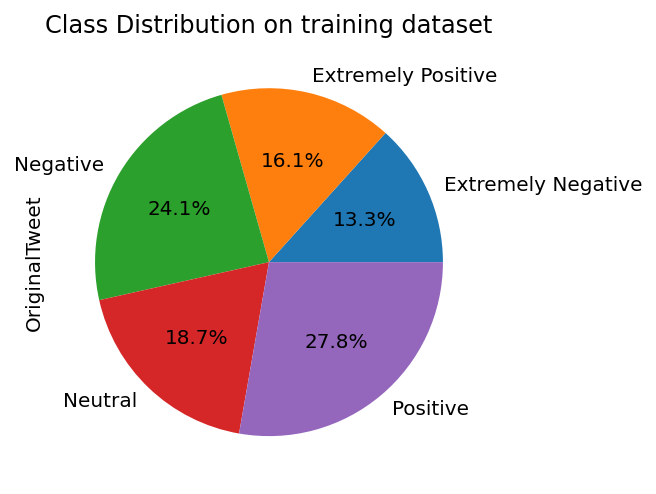

In [92]:
# groping them by sentiment
%matplotlib inline
from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'retina'


sentiment_class = data_train['OriginalTweet'].groupby(data_train.Sentiment).count()
ax = sentiment_class.plot(kind='pie',autopct='%1.1f%%')
ax.set_title('Class Distribution on training dataset')

Text(0.5, 1.0, 'Class Distribution on training dataset')

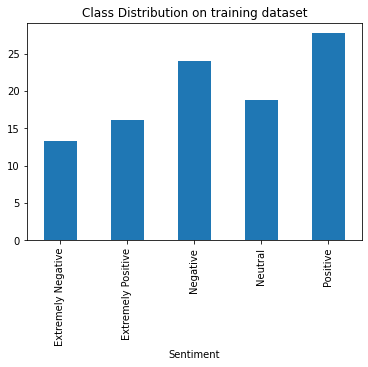

In [31]:
ax = sentiment_class_per.plot(kind='bar')
ax.set_title('Class Distribution on training dataset')

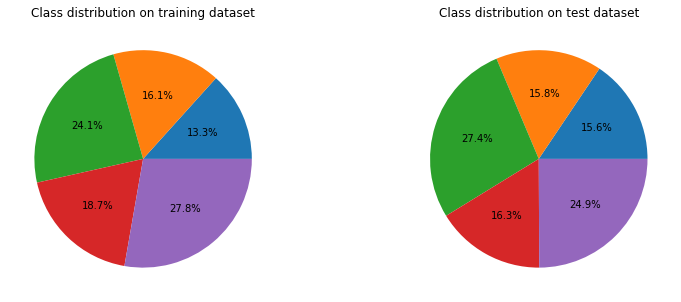

In [88]:

data1 = data_train['OriginalTweet'].groupby(data_train.Sentiment).count()
data2 = data_test['OriginalTweet'].groupby(data_test.Sentiment).count()

# create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(13)
fig.set_figheight(5)

# plot each pie chart in a separate subplot
ax1.pie(data1,autopct='%1.1f%%')
ax2.pie(data2,autopct='%1.1f%%')
ax1.title.set_text('Class distribution on training dataset')
ax2.title.set_text('Class distribution on test dataset')
#plt.subplots_adjust(wspace=0.5)

plt.show()

Some examples:

In [82]:
# example of one tweet along with its sentiment:
train.iloc[5,:].values


#extremely positive: tweet que anima a cuidar de todos
print(train.iloc[12,:][1],':', train.iloc[12,:][0])
print()

#positive: consejo para crear listas de contactos
print(train.iloc[1,:][1],':', train.iloc[1,:][0])
print()

#positive: acudio en masa a comprar, positivo???
print(train.iloc[5,:][1],':', train.iloc[5,:][0])
print()

#neutral
print(train.iloc[7,:][1],':', train.iloc[7,:][0])
print()


# extr. negative: china culpable
print(train.iloc[20,:][1],':', train.iloc[20,:][0])
print()



#negative: pagar con tarjetas de crédito, a mi me parece neutro
print(train.iloc[9,:][1],':', train.iloc[9,:][0])
print()

#  negative: crítica al gobierno británico para asegurar los productos esenciales y controlar a la gente
# y que no recaiga en el personal de los supermercados
print(train.iloc[24,:][1],':', train.iloc[24,:][0])
print()

Extremely Positive : #horningsea is a caring community. LetÂs ALL look after the less capable in our village and ensure they stay healthy. Bringing shopping to their doors, help with online shopping and self isolation if you have symptoms or been exposed to somebody who has. https://t.co/lsGrXXhjhh

Positive : advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order

Positive : As news of the regionÂs first confirmed COVID-19 case came out of Sullivan County last week, people flocked to area stores to purchase cleaning supplies, hand sanitizer, food, toilet paper and other goods, @Tim_Dodson reports https://t.co/cfXch7a2lU



#toiletpapercrisis #covid_19 https://t.co/eVXkQLIdAZ

Extremely Negative : with 100  nations inficted with  covid  19  the world must  not  play fair with china  100 goverments must d

## Encoding the sentiment classes

We will use encoding for the sentiment classes, so that the analysis gets easier when applying the models.

In [90]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train['Sentiment'] = le.fit_transform(train['Sentiment'])
#train.head(2)
test['Sentiment'] = le.fit_transform(test['Sentiment'])
#test.head(2)

# transform train and test variables to numpy arrays:
train = train.to_numpy()
test = test.to_numpy()
# now we have both variables as numpy arrays
#print(type(test), type(train))

In [91]:
print(le.inverse_transform([0,1,2,3,4]))

['Extremely Negative' 'Extremely Positive' 'Negative' 'Neutral' 'Positive']


In [93]:
# natural language toolkit

from nltk.stem import PorterStemmer

import re
import string
import random


from gensim.parsing.preprocessing import remove_stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
{'your', 'are', 'any', 'to', 'she', 'has', 'there', 'with', 'be', "doesn't", 'no', 'was', 'needn', 'couldn', 'than', 'herself', "hasn't", "it's", 'own', 'were', 'that', 'not', 'll', 'having', 'hasn', 'wasn', 'why', 'during', 'nor', 'after', 'her', 'i', 'am', 'wouldn', 'we', "you'll", 'a', 'into', 'most', 'the', 'above', 'in', 'm', 'how', 'here', "aren't", 'below', "weren't", 'my', "she's", 'them', 'which', 'by', 'been', 'or', 'just', 'ain', 'up', 'against', 'do', 'again', 'd', 'such', 'where', 'will', 'have', 'did', 'isn', 'ma', 'for', 'mightn', 'those', "you'd", "that'll", 'shouldn', "wouldn't", 'under', 'now', 'an', 'as', "shouldn't", 've', 'more', 'between', 'o', 'from', "wasn't", 'if', 'our', 'can', "couldn't", 'and', 'same', 'being', 'ourselves', 'he', 'very', "should've", "you're", 'only', 'they', "needn't", 't', 'don', "mustn't", 'these', 'theirs', 'about', 'who

## Cleaning the data from hashtags and twitter symbols

Removing all these symbols will facilitate our analysis and make the models understand the words better.

In [94]:
# for the training texts
def clean_texts(df):

    for i in range(len(df)):
        text = df[i,0]
        text = re.sub("@\S+", " ", text)      # getting rid of mentions @
        text = re.sub("https*\S+", " ", text) # getting rid of links, that can be present everywhere
        text = re.sub("#\S+", " ", text)      # getting rid of hashtags
        text = re.sub("\'\w+", '', text)      # getting rid of spaces
        text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text) # changing punctuation
        text = re.sub(r'\w*\d+\w*', '', text) # remove prefixes
        text = re.sub('\s{2,}', " ", text)    # replaces two or more spaces by only one
        text = text.lower()                   # set all text to lower letters
        text = re.sub('gt gt gt', "", text)   # removes this series of words that are for no use
        text = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", text)
        df[i,0]=text         # store the new variable 
    


In [95]:
clean_texts(train)
clean_texts(test)

Now we will see if the texts look the way we would expect:

In [96]:
# training
for i in range(3):
    tweet = train[random.randint(0,len(train)-1),0]
    print('-------')
    print(tweet)

-------
 watch the share prices for companies that provide funeral services and linked industries go up might want to note if any one in congress buys them 
-------
if someone told me two months ago that a mask is suggested for trips out in public i would have thought they were crazy a trip to the grocery store with a mask on a sunday 
-------
as communities look to their grocery store for food and supplies during the coronavirus emergency two supermarket chains are reacting by hiring more workers 


## Normalization and removing 

In [ ]:
# get all stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
print(stop_words)

from nltk.tokenize import word_tokenize 
lemmatizer = nltk.WordNetLemmatizer()

def remove_stopwords(df):
    for i in range(len(df)):
        text = df[i,0]
        text_tokens = word_tokenize(text)
        tokens = [lemmatizer.lemmatize(word) for word in text_tokens if not word in stopwords.words()]
        df[i,0]=' '.join(tokens)
        
remove_stopwords(train)
remove_stopwords(test)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
{'your', 'are', 'any', 'to', 'she', 'has', 'there', 'with', 'be', "doesn't", 'no', 'was', 'needn', 'couldn', 'than', 'herself', "hasn't", "it's", 'own', 'were', 'that', 'not', 'll', 'having', 'hasn', 'wasn', 'why', 'during', 'nor', 'after', 'her', 'i', 'am', 'wouldn', 'we', "you'll", 'a', 'into', 'most', 'the', 'above', 'in', 'm', 'how', 'here', "aren't", 'below', "weren't", 'my', "she's", 'them', 'which', 'by', 'been', 'or', 'just', 'ain', 'up', 'against', 'do', 'again', 'd', 'such', 'where', 'will', 'have', 'did', 'isn', 'ma', 'for', 'mightn', 'those', "you'd", "that'll", 'shouldn', "wouldn't", 'under', 'now', 'an', 'as', "shouldn't", 've', 'more', 'between', 'o', 'from', "wasn't", 'if', 'our', 'can', "couldn't", 'and', 'same', 'being', 'ourselves', 'he', 'very', "should've", "you're", 'only', 'they', "needn't", 't', 'don', "mustn't", 'these', 'theirs', 'about', 'whom', "shan't"

In [ ]:
# converting to pandas dataframe
train = pd.DataFrame(train)
test = pd.DataFrame(test)

train.columns = ['tweet', 'label']
test.columns = ['tweet', 'label']

In [ ]:
test.head()

,tweet,label
0,trending new yorkers encounter supermarket she...,0
1,couldn hand sanitizer fred meyer turned pack p...,4
2,protect loved ones,1
3,buying hits city anxious shoppers stock food a...,2
4,week buying baby milk powder buying toilet paper,3


In [ ]:
# no missing data
train.isnull().sum(), test.isnull().sum()

(Corpus    0
 label     0
 dtype: int64,
 Corpus    0
 label     0
 dtype: int64)

## Saving the cleaned texts into  csv files

In [ ]:
# creating csv for training and testing cleaned files
train.to_csv(root+'data/train.csv', index=None)
test.to_csv(root+'data/test.csv', index=None)